# Healthcare Analytics Assignment
**Name:** Rumaz Qureshi  
**Roll Number:** 22F-BSAI-52  
**Assignment:** AI Healthcare Data Analysis  
**Subject:** Artificial Intelligence Programming  


In [71]:
# Loading Required Packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.feature_selection import VarianceThreshold

In [52]:
# Reading the Dataset
patient_df = pd.read_csv('patient_data.csv')
display(patient_df.head())
print(f"\033[1mDataset Insight:\033[0m Total Rows & Columns: {patient_df.shape}")

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High


Dataset Insight: Total Rows & Columns: (100, 7)


In [53]:
# Checking dataset information
patient_df.info()
print(f"\033[1mObservation:\033[0m No missing values detected in the dataset.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         100 non-null    int64  
 1   Gender            100 non-null    object 
 2   Age               100 non-null    int64  
 3   CholesterolLevel  100 non-null    float64
 4   BloodPressure     100 non-null    float64
 5   Region            100 non-null    object 
 6   RiskCategory      100 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB
Observation: No missing values detected in the dataset.


# Question 1: Outlier Detection and Feature Reduction

In [54]:
# Feature Selection: Dropping constant columns
const_selector = VarianceThreshold(threshold=0.0)  # Eliminating constant features
filtered_array = const_selector.fit_transform(patient_df.select_dtypes(include=['float64', 'int64']))

selected_cols = patient_df.select_dtypes(include=['float64', 'int64']).columns[const_selector.get_support()]
final_df = patient_df[selected_cols].join(patient_df.select_dtypes(include='object'))

print(f"\033[1mUpdate:\033[0m Constant features removed. Total remaining columns: {final_df.shape[1]}")

# Display which features were removed
dropped_features = list(set(patient_df.select_dtypes(include=['number']).columns) - set(selected_cols))
print(f"\033[1mDropped Constant Features:\033[0m {dropped_features}")


Update: Constant features removed. Total remaining columns: 7
Dropped Constant Features: []


In [65]:
# Outlier Detection & Removal for CholesterolLevel

Q1, Q3 = np.percentile(final_df['CholesterolLevel'], [25, 75])  # NumPy method for quartiles

# Alternatively (Pandas method):
# Q1, Q3 = final_df['CholesterolLevel'].quantile([0.25, 0.75])

# Calculating IQR
iqr_range = Q3 - Q1
lower_limit = Q1 - (1.5 * iqr_range)
upper_limit = Q3 + (1.5 * iqr_range)

# Filtering Outliers
clean_df = final_df[(final_df['CholesterolLevel'] >= lower_limit) & (final_df['CholesterolLevel'] <= upper_limit)]

print(f"\033[1mNote:\033[0m Outliers removed from 'CholesterolLevel'. Rows reduced from {final_df.shape[0]} to {clean_df.shape[0]}.")


Note: Outliers removed from 'CholesterolLevel'. Rows reduced from 100 to 98.


In [66]:
# Verifying Missing Values in the Dataset
null_check = clean_df.isnull().sum()
null_check  # Confirming absence of missing data


,0
PatientID,0
Age,0
CholesterolLevel,0
BloodPressure,0
Gender,0
Region,0
RiskCategory,0


# Question 2:  Data Visualization

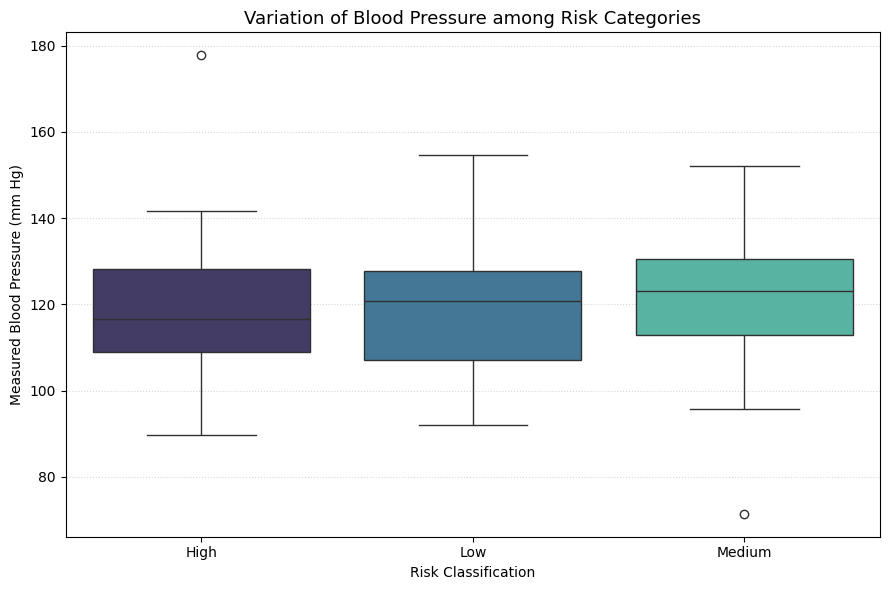

In [67]:
# Question 2: Box Plot for Blood Pressure across Risk Categories
plt.figure(figsize=(9, 6))

# Drawing Boxplot
sb.boxplot(data=clean_df, x='RiskCategory', y='BloodPressure', palette='mako', hue='RiskCategory')

plt.title('Variation of Blood Pressure among Risk Categories', fontsize=13)
plt.xlabel('Risk Classification')
plt.ylabel('Measured Blood Pressure (mm Hg)')
plt.grid(True, which='major', axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


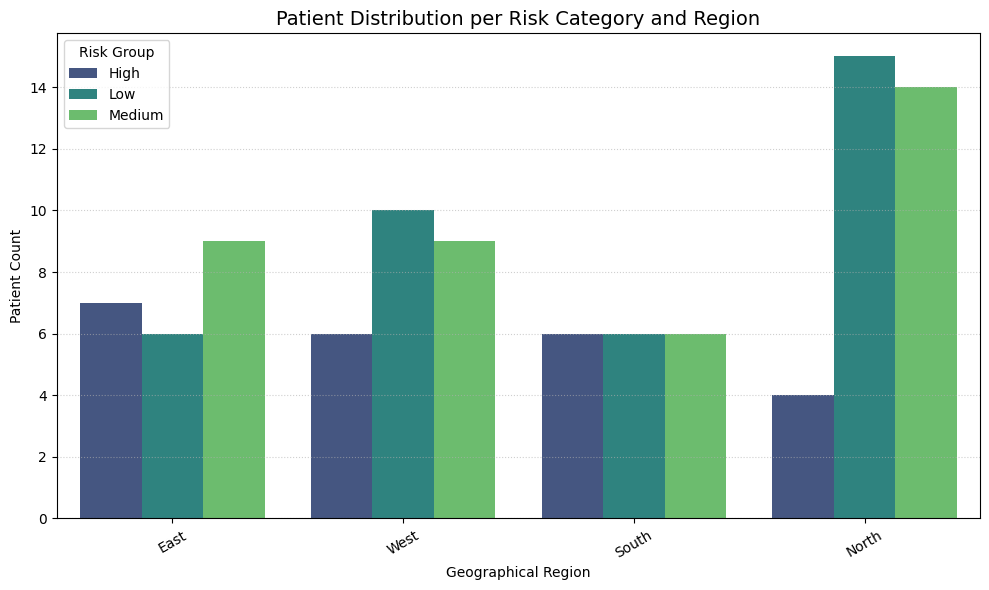

In [68]:
# Question 2: Count Plot of Risk Category across Regions

plt.figure(figsize=(10, 6))
sb.countplot(data=clean_df, x='Region', hue='RiskCategory', palette='viridis')

plt.title("Patient Distribution per Risk Category and Region", fontsize=14)
plt.xlabel('Geographical Region')
plt.ylabel('Patient Count')
plt.legend(title='Risk Group')
plt.xticks(rotation=30)
plt.grid(True, which='major', axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


# Question 3 Hypothesis testing
    - Test 1: Is the average CholesterolLevel significantly different from 200 mg/dl (sample size = 20)
*Null Hypothesis (H0)*: µ = 200    
*Alternate Hypothesis (H1)*: µ ≠ 200   
Use a *two-tailed t-test*

In [72]:
from scipy.stats import ttest_1samp

# Drawing 20 random samples from 'CholesterolLevel'
chol_sample = clean_df['CholesterolLevel'].sample(20, random_state=7)

# Conducting One-Sample t-test
t_statistic, p_val = ttest_1samp(chol_sample, popmean=200)

# Displaying results
print(f"\033[1mT-Test Outcome:\033[0m \n T-Statistic: {t_statistic:.4f}, P-Value: {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print("\033[1mConclusion:\033[0m Reject H₀ — The average Cholesterol Level significantly differs from 200 mg/dL.")
else:
    print("\033[1mConclusion:\033[0m Fail to reject H₀ — No significant difference detected from 200 mg/dL.")

T-Test Outcome: 
 T-Statistic: -0.3507, P-Value: 0.7297
Conclusion: Fail to reject H₀ — No significant difference detected from 200 mg/dL.


## Test 2:
    Is there a significant relationship between Region & RiskCategoery?

**Null Hypothesis (H0)**: Region & RiskCategory are independent  
**Alternate Hypothesis (H1)**: There is a significant Relationship  
Using **Chi-square Test of Independence**

In [73]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.crosstab(clean_df['Region'], clean_df['RiskCategory'])

# Observed Values
print("\033[1mObserved Values:\033[0m")
display(contingency_table.values)

# Performing Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Results
print(f"\n\033[1mChi-Square Test Outcome:\033[0m\nChi-Square Statistic: {chi2_stat:.4f}, P-Value: {p_val:.4f}, Degrees of Freedom: {dof}")

# Conclusion
if p_val < 0.05:
    print("\033[1mConclusion:\033[0m Reject H₀ — There is a significant association between Region and Risk Category.")
else:
    print("\033[1mConclusion:\033[0m Fail to reject H₀ — No significant relationship found between Region and Risk Category.")


Observed Values:


array([[ 7,  6,  9],
       [ 4, 15, 14],
       [ 6,  6,  6],
       [ 6, 10,  9]])


Chi-Square Test Outcome:
Chi-Square Statistic: 4.8247, P-Value: 0.5665, Degrees of Freedom: 6
Conclusion: Fail to reject H₀ — No significant relationship found between Region and Risk Category.


# Question 04:

Model the progression of a patient's medication in the bloodstream.
Equation:
 dC/dt = k(D - C)
Where:
- k = 0.1, D = 100, C(0) = 0
- Solve this ODE for t = 0 to 50 using both odeint and solve_ivp
- Plot the result and explain the difference in output between the two solvers, if any.

In [74]:
# Defining the ODE system
from scipy.integrate import odeint, solve_ivp


# Constants
k =0.1
D = 100

# ODE function
def dc_dt(C, t):
    return k * (D-C)


# Solving using odeint

# time vector
t = np.linspace(0,50,200)

# initial condition
C0 = 0

# Solve ODe
c_odeint = odeint(dc_dt, C0, t)

In [75]:
# Solving  the ODE using solve_ivp

def dc_dt_ivp(t,C):
    return k * (D - C)

# Solve ODE
sol_ivp = solve_ivp(dc_dt_ivp, t_span=[0,50], y0=[0], t_eval=t)
# print(sol_ivp)

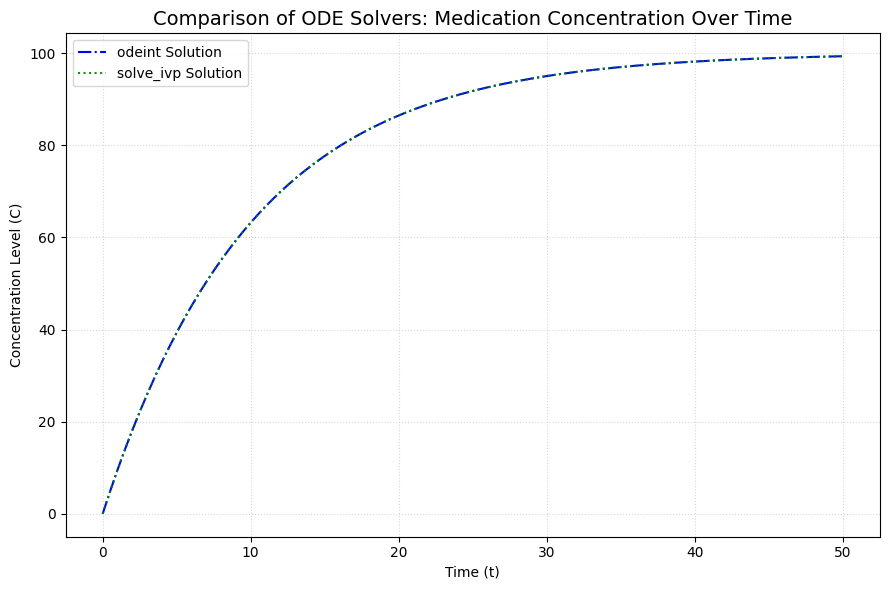

In [63]:
# Visualizing ODE Solutions from odeint and solve_ivp
plt.figure(figsize=(9, 6))

# Plotting odeint result
plt.plot(t, c_odeint, label='odeint Solution', linestyle='-.', color='blue')

# Plotting solve_ivp result
plt.plot(sol_ivp.t, sol_ivp.y[0], label='solve_ivp Solution', linestyle=':', color='green', alpha=0.9)

plt.title("Comparison of ODE Solvers: Medication Concentration Over Time", fontsize=14)
plt.xlabel("Time (t)")
plt.ylabel("Concentration Level (C)")
plt.legend(loc='best')
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


# As we can see both Solvers Produces nearly Identical Results  Fro this ODE.